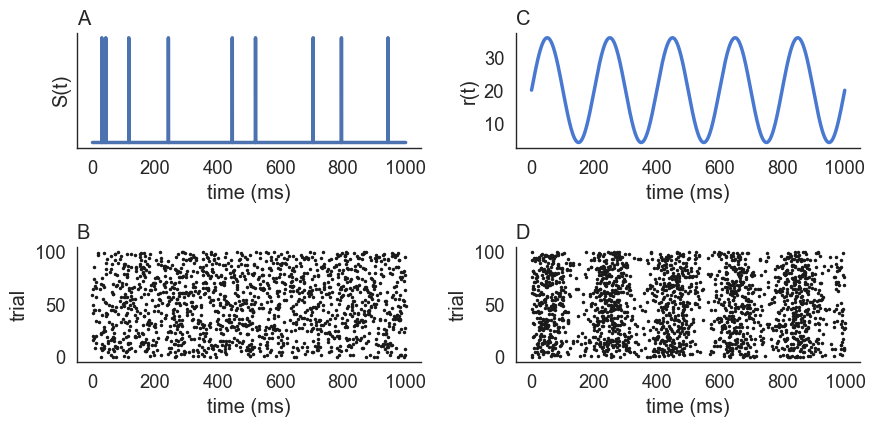

In [1]:
###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')

###############################################
###############################################


# Rate in kHz
r=15/1000 

# Time interval length
T=1000 

# Discretized time
T=1000 
dt=.1 
time=np.arange(0,T,dt)

# Method 1: Generate spike counts, 
# then generate spike density from that
N=np.random.poisson(r*T)
SpikeTimes=np.sort(np.random.rand(N)*T)
S=np.zeros_like(time)
S[(SpikeTimes/dt).astype(int)]=1/dt

# Method 2: Generate spike density, 
# then get spike times from that
S=np.random.binomial(1, r*dt, len(time))/dt
SpikeTimes=np.nonzero(S)[0]*dt

plt.subplots(2,2,figsize=(9, 4.5))

plt.subplot(2,2,1)
plt.plot(time,S,'b')
plt.xlabel('time (ms)')
plt.ylabel('S(t)')
plt.yticks([])
plt.title('A',loc='left')
sns.despine()


# Now generate several trials of a Poisson process
# and make a raster plot

# Number of trials
NumTrials=100 

# Generate Poisson processes
S=np.random.binomial(1, r*dt, (NumTrials,len(time)))/dt

# Extract spike times and trial numbers
[I,J]=np.nonzero(S)
SpikeTimes=J*dt
TrialNumbers=I 


plt.subplot(2,2,3)
plt.plot(SpikeTimes,TrialNumbers,'k.',markersize=3)
plt.xlabel('time (ms)')
plt.ylabel('trial')
plt.title('B',loc='left')
sns.despine()


# Now generate several trials of an inhomogeneous 
# Poisson process

# Time-dependent rate (in kHz)
r=(20+16*np.sin(2*np.pi*time/200))/1000 

S=np.random.binomial(1,r*dt,(NumTrials,len(time)))/dt

plt.subplot(2,2,2)
plt.plot(time,1000*r)
plt.xlabel('time (ms)')
plt.ylabel('r(t)')
plt.title('C',loc='left')
sns.despine()

# Get spike times and trial indices
[TrialNumbers,SpikeTimes]=np.nonzero(S) 
SpikeTimes=SpikeTimes*dt 

plt.subplot(2,2,4)
plt.plot(SpikeTimes,TrialNumbers,'k.',markersize=3)
plt.xlabel('time (ms)')
plt.ylabel('trial')
plt.title('D',loc='left')
sns.despine()


plt.tight_layout()

